# Min-Area Evaluation

Experiments run with a timelimit of 7200s (2hr) on algpc02. There have been two models, but the Edge-Model showed to be problematic and slower, thus, we removed it.

The experimentes have been executed with CPLEX, thus, we do not have the data to analyze the progress over time for the area optimization. It does not seem to be feasible, to quickly change that. However, the two different models also take up some space.

In [1]:
import json
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()
plt.rcParams.update({'figure.max_open_warning': 0
                    ,"text.usetex": True
                    ,"font.family": "serif"
                    })
sns.set_palette("tab10")
PAPER_WIDTH = 10

## Explaining the data

In [2]:
t_experiments = pd.read_json("./00_minarea_data.json.zip")
t_experiments = t_experiments[t_experiments["Model"]=="Triangle"] # Edge is instable and slow!
t_experiments.drop(columns=["Model"], inplace=True)
full_techniques =  t_experiments[t_experiments["num_vertices"]==23]["sparsification_technique"].unique()
t_experiments = t_experiments[t_experiments["sparsification_technique"].isin(full_techniques)]

* **num_vertices:** The number of vertices in this instance. Most of the instances have been created in 5-steps.
* **sparsification_technique:** The used sparsification technique. The complete graph has "complete".
* **ObjVal:** The objective value of the solution (either optimal or the best at timeout).
* **filename_instance:** The file of the instance. Use this to distinguish different instances. The name also states something about its properties.
* **Runtime:** The runtime in seconds. The time limit has been 3600s.
* **Status:** The status code. 2 means solved to optimality. For sparisified instances, the instance may be solved in time but infeasible.
* **LowerBound:** The lower bound. If Status==2, it should equal the ObjVal.
* **solver:** Just the name of the solver. Not of relevance.
* **LowerBound_best:** The best known lower bound for the instance (complete graph)

In [3]:
lbs = t_experiments[t_experiments["sparsification_technique"]=="complete"].groupby("filename_instance")["LowerBound"].max()
t_experiments = pd.merge(left=t_experiments, right=lbs, left_on="filename_instance", right_index=True, suffixes=("", "_best"))

In [4]:
t_experiments

,pointset,LowerBound,Solved,UpperBound,id_solver,instance_solver,filename_solver,Runtime,ObjVal,MIPGap,...,num_vertices,GRB_OUT_Incumbent,GRB_OUT_BestBd,sparsification_technique,size,filename_instance,type,id_instance,size_binned,LowerBound_best
467,GSFC_20171208_Archive_e000256_orig_6_0,60177.500000,True,-1,GSFC_20171208_Archive_e000256_orig_6_0_complet...,GSFC_20171208_Archive_e000256_orig_6_0_complete,GSFC_20171208_Archive_e000256_orig_6_0_complet...,0.004469,60177.500000,0.0,...,6,NaN,NaN,complete,6,GSFC_20171208_Archive_e000256_orig_6_0.json,image_brightness,GSFC_20171208_Archive_e000256_orig_6_0,"{'closed': 'right', 'closed_right': True, 'lef...",60177.500000
480,GSFC_20171208_Archive_e000256_orig_6_0,60177.500000,True,-1,GSFC_20171208_Archive_e000256_orig_6_0_delauna...,GSFC_20171208_Archive_e000256_orig_6_0_delaunayT,GSFC_20171208_Archive_e000256_orig_6_0_delauna...,0.003036,60177.500000,0.0,...,6,NaN,NaN,delaunayT,6,GSFC_20171208_Archive_e000256_orig_6_0.json,image_brightness,GSFC_20171208_Archive_e000256_orig_6_0,"{'closed': 'right', 'closed_right': True, 'lef...",60177.500000
478,GSFC_20171208_Archive_e000256_orig_6_0,60177.500000,True,-1,GSFC_20171208_Archive_e000256_orig_6_0_greedyT...,GSFC_20171208_Archive_e000256_orig_6_0_greedyT,GSFC_20171208_Archive_e000256_orig_6_0_greedyT...,0.002914,60177.500000,0.0,...,6,NaN,NaN,greedyT,6,GSFC_20171208_Archive_e000256_orig_6_0.json,image_brightness,GSFC_20171208_Archive_e000256_orig_6_0,"{'closed': 'right', 'closed_right': True, 'lef...",60177.500000
460,GSFC_20171208_Archive_e000256_orig_6_0,60177.500000,True,-1,GSFC_20171208_Archive_e000256_orig_6_0_mwT_Min...,GSFC_20171208_Archive_e000256_orig_6_0_mwT,GSFC_20171208_Archive_e000256_orig_6_0_mwT_Min...,0.002975,60177.500000,0.0,...,6,NaN,NaN,mwT,6,GSFC_20171208_Archive_e000256_orig_6_0.json,image_brightness,GSFC_20171208_Archive_e000256_orig_6_0,"{'closed': 'right', 'closed_right': True, 'lef...",60177.500000
461,GSFC_20171208_Archive_e000256_orig_6_0,60177.500000,True,-1,GSFC_20171208_Archive_e000256_orig_6_0_onion-0...,GSFC_20171208_Archive_e000256_orig_6_0_onion-0,GSFC_20171208_Archive_e000256_orig_6_0_onion-0...,0.004033,60177.500000,0.0,...,6,NaN,NaN,onion-0,6,GSFC_20171208_Archive_e000256_orig_6_0.json,image_brightness,GSFC_20171208_Archive_e000256_orig_6_0,"{'closed': 'right', 'closed_right': True, 'lef...",60177.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24029,20210725_uniform_real_7_1,-1.000000,False,-1,20210725_uniform_real_7_1_yao12-1_Min_area,20210725_uniform_real_7_1_yao12-1,20210725_uniform_real_7_1_yao12-1_Min_area.json,0.004421,0.000000,0.0,...,7,NaN,NaN,yao12-1,7,20210725_uniform_real_7_1.json,uniform_real,20210725_uniform_real_7_1,"{'closed': 'right', 'closed_right': True, 'lef...",60215.173132
24024,20210725_uniform_real_7_1,60215.173132,True,-1,20210725_uniform_real_7_1_yao12-2_Min_area,20210725_uniform_real_7_1_yao12-2,20210725_uniform_real_7_1_yao12-2_Min_area.json,0.018834,60215.173132,0.0,...,7,NaN,NaN,yao12-2,7,20210725_uniform_real_7_1.json,uniform_real,20210725_uniform_real_7_1,"{'closed': 'right', 'closed_right': True, 'lef...",60215.173132
24025,20210725_uniform_real_7_1,-1.000000,False,-1,20210725_uniform_real_7_1_yao6-0_Min_area,20210725_uniform_real_7_1_yao6-0,20210725_uniform_real_7_1_yao6-0_Min_area.json,0.004456,0.000000,0.0,...,7,NaN,NaN,yao6-0,7,20210725_uniform_real_7_1.json,uniform_real,20210725_uniform_real_7_1,"{'closed': 'right', 'closed_right': True, 'lef...",60215.173132
24030,20210725_uniform_real_7_1,-1.000000,False,-1,20210725_uniform_real_7_1_yao6-1_Min_area,20210725_uniform_real_7_1_yao6-1,20210725_uniform_real_7_1_yao6-1_Min_area.json,0.004397,0.000000,0.0,...,7,NaN,NaN,yao6-1,7,20210725_uniform_real_7_1.json,uniform_real,20210725_uniform_real_7_1,"{'closed': 'right', 'closed_right': True, 'lef...",60215.173132


In [5]:
t_experiments[t_experiments["LowerBound"]>1.01*t_experiments["ObjVal"]]

,pointset,LowerBound,Solved,UpperBound,id_solver,instance_solver,filename_solver,Runtime,ObjVal,MIPGap,...,num_vertices,GRB_OUT_Incumbent,GRB_OUT_BestBd,sparsification_technique,size,filename_instance,type,id_instance,size_binned,LowerBound_best


<AxesSubplot: ylabel='Frequency'>

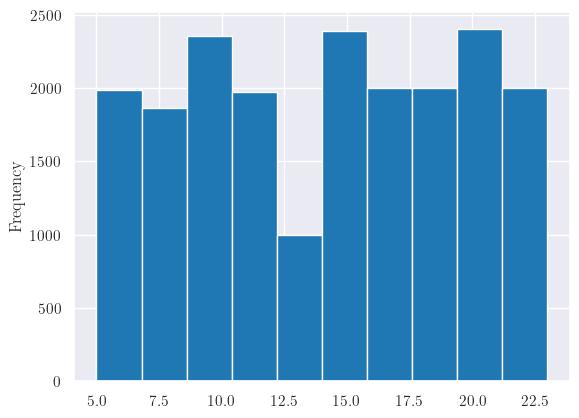

In [6]:
t_experiments["num_vertices"].plot.hist()

## 1. Feasibility

Quite a lot of sparsifications instances are barely feasible. Luckily the infeasible sparsifications are nearly identical for both models. For the Triangle-Model the feasibility is slightly worse.

In [7]:
only_larger_than = 5
num_instances = t_experiments[(t_experiments["num_vertices"]>=only_larger_than)]["filename_instance"].nunique()
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
t

sparsification_technique
onion-1-1    0.874737
onion-2-1    0.586316
theta12-0    0.890526
theta12-1    0.885263
theta12-2    0.003158
theta6-0     0.488421
theta6-1     0.480000
theta6-2     0.034737
wspd2-3      0.154737
yao12-0      0.890526
yao12-1      0.885263
yao12-2      0.003158
yao6-0       0.635789
yao6-1       0.623158
yao6-2       0.033684
Name: filename_instance, dtype: float64

In [8]:
#t_experiments[(t_experiments["Status"]==3) & (t_experiments["sparsification_technique"]=="complete")].iloc[1]

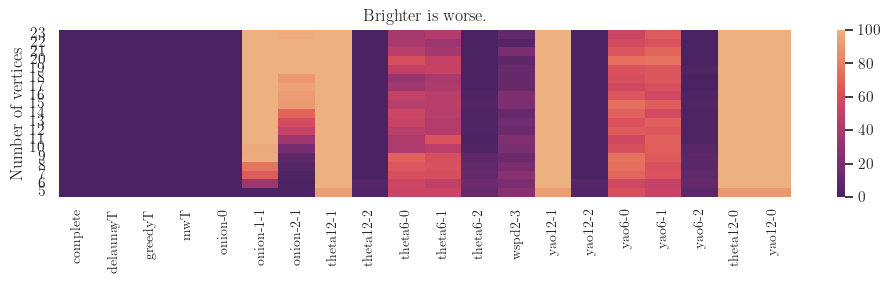

In [9]:
fig = plt.figure(figsize=(PAPER_WIDTH,3))
t = t_experiments.copy()
t["Infeasible"] = (t["Status"]==3).apply(lambda x: 100 if x else 0)
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Infeasible"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Infeasible"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, yticklabels=True)
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title("Brighter is worse.")
plt.tight_layout()
plt.savefig("./output/feasibility.pdf")
plt.show()

As we see above, the infeasible instances are relatively independent of the size and nearly identical for both models.

Let us ignore the following sparsification techniques, because more than 10% of them are infeasible

In [10]:
t = t_experiments[(t_experiments["Status"]==3) & (t_experiments["num_vertices"]>=only_larger_than)].groupby("sparsification_technique")["filename_instance"].nunique()/num_instances
techniques_to_ignore = list(t[t>0.1].index)
techniques_to_ignore

['onion-1-1',
 'onion-2-1',
 'theta12-0',
 'theta12-1',
 'theta6-0',
 'theta6-1',
 'wspd2-3',
 'yao12-0',
 'yao12-1',
 'yao6-0',
 'yao6-1']

In [11]:
t_experiments_feasible = t_experiments[~t_experiments["sparsification_technique"].isin(techniques_to_ignore)]

## 2. Solution Quality

Let us next look at the solution quality because bad solutions are not useful independent of how quick we can obtain them.

We are using *best upper bound/best lower bound* as metric (all bounds computed with timeout).

In [12]:
t = t_experiments_feasible.copy()
t=t[t["Status"]!=3]
t["Gap"] = t["ObjVal"]/t["LowerBound_best"]

In [13]:
t[(t["Gap"]<0.99) & (t["sparsification_technique"]=="complete")]

,pointset,LowerBound,Solved,UpperBound,id_solver,instance_solver,filename_solver,Runtime,ObjVal,MIPGap,...,GRB_OUT_Incumbent,GRB_OUT_BestBd,sparsification_technique,size,filename_instance,type,id_instance,size_binned,LowerBound_best,Gap


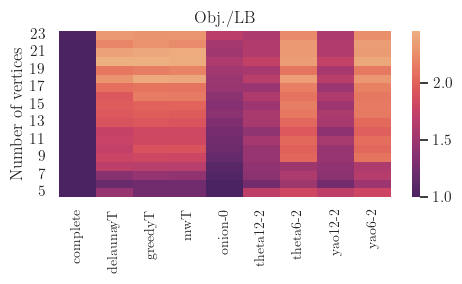

In [14]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t_ = t.groupby(["num_vertices", "sparsification_technique"])["Gap"].mean().reset_index()
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["Gap"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
#plt.title("Brighter is worse.")
plt.title("Obj./LB")
plt.tight_layout()
plt.savefig("./output/solution_quality_heatmap.pdf")
plt.show()

/tmp/ipykernel_10637/3317444741.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)


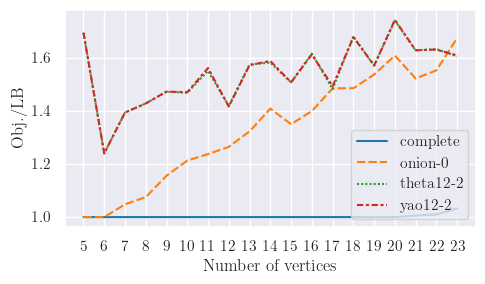

In [15]:
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
detail_sparsification_techniques = ["complete", "onion-0", "theta12-2", "wspd2-3", "yao12-2"]
t_ = t[t["sparsification_technique"].isin(detail_sparsification_techniques)].copy()
t_.rename(columns={"sparsification_technique": "spars"}, inplace=True)
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "spars"], inplace=True)
sns.lineplot(data=t_, x="x", y="Gap", hue="spars", style="spars",ci=None)
plt.legend(title="", loc="lower right")
plt.xlabel("Number of vertices")
#plt.title("Lower is better.")
plt.tight_layout()
plt.ylabel("Obj./LB")
plt.savefig("./output/solution_quality_lineplot.pdf")
plt.show()

We see that only theta12-2, wspd2-3, and yao12-2 yield reasonably good results. The theta-12-2 and yao12-2 seem to coincide. The WSPD2-3 has slightly better results but the difference is relatively inconsistent and small. Both seem to grow with the number of vertices and are above 1.5 for 20 vertices.

## 2. Runtime

Let us next take a look on the runtime. We are comparing a lot of different strategies which are too much for a lineplot. Instead we do a heatmap that shows us, which instances could still be solved wihtin a strict time limit. Infeasible instances are considered as unsolved (they are slightly worse but in both cases we do not obtain the desired solution from the sparsification).

From this heatmap, we select a few intersting strategies for which we then also compare the concrete runtime in a lineplot.

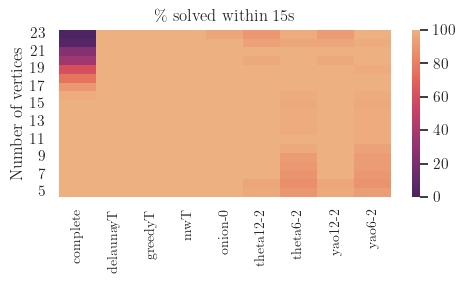

In [16]:
TIMEOUT_AFTER_S = 15
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))

t = t_experiments_feasible.copy()
t["timeout"] = (t["Runtime"]>TIMEOUT_AFTER_S).apply(lambda x: 0 if x else 100)
t.loc[t["Status"]!=2, "timeout"]=0
t_ = t.groupby(["num_vertices", "sparsification_technique"])["timeout"].mean().reset_index()
t_
sparsification_techniques = t["sparsification_technique"].unique()
t__ = pd.DataFrame()
for s in sparsification_techniques:
    column = t_[t_["sparsification_technique"]==s].groupby("num_vertices")["timeout"].mean().copy()
    t__[s]=column
#pd.melt(t_,id_vars=["sparsification_technique"], value_vars=["timeout"])
t__.sort_index(inplace=True, ascending=False)
sns.heatmap(data=t__, cmap="flare_r", xticklabels=True, vmin=0)
#plt.xlabel("Sparsification Technique")
plt.xlabel("")
plt.yticks(rotation=0)
#plt.gca().set_xticks(range(len(list(sparsification_techniques))))
plt.xticks(rotation=90,fontsize=10)
#plt.set_xticklabels(list(range(len(sparsification_techniques))))
plt.ylabel("Number of vertices")
plt.title(f"\% solved within {TIMEOUT_AFTER_S}s")
#plt.title(f"Solved within {TIMEOUT_AFTER_S}s. Brighter is better.")
plt.tight_layout()
plt.savefig("./output/runtime_heatmap.pdf")
plt.show()

/tmp/ipykernel_10637/169140962.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification", ci=None)


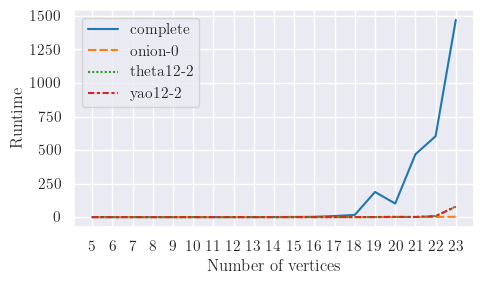

In [17]:
INTERESTING_STRATEGIES =["complete", "onion-0", "theta12-2", "wspd2-3", "yao12-2"]
fig = plt.figure(figsize=(0.5*PAPER_WIDTH,3))
t = t_experiments_feasible.copy()
t_ = t[t["sparsification_technique"].isin(INTERESTING_STRATEGIES)].copy()
t_.rename(columns={"sparsification_technique": "Sparsification"}, inplace=True)
t_["x"]=t_["num_vertices"].apply(lambda x: str(int(x)))
t_.sort_values(by=["num_vertices", "Sparsification"], inplace=True)
sns.lineplot(data=t_, x="x", y="Runtime", hue="Sparsification", style="Sparsification", ci=None)
plt.legend(title="")
plt.xlabel("Number of vertices")
plt.tight_layout()
plt.savefig("./output/runtime_lineplot.pdf")
plt.show()

While WSP2-3 had a small advantage for the quality, it is much slower than theta-12-2 and yao-2 (which again coincide). Solving the theta-12-2 or yao-2 happens extremely fast, within a fraction of the complete graph. WSPD2-3 is still faster than the complete graph, but e.g. for 19 vertices, the runtime is nearly identical. For 20 vertices, it only need 10% of the time (but the other two need less than 1%.

In [18]:
t = t_experiments_feasible.copy()
t[t["num_vertices"]==20].groupby("sparsification_technique")["Runtime"].mean()

sparsification_technique
complete     101.059686
delaunayT      0.046123
greedyT        0.061243
mwT            0.060047
onion-0        0.472594
theta12-2      1.567298
theta6-2       0.065323
yao12-2        1.642762
yao6-2         0.069493
Name: Runtime, dtype: float64